In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
X, y = make_classification(n_samples = 1000, n_features = 5, n_classes = 3, n_clusters_per_class = 1, random_state = 36)

In [3]:
splitter = KFold(n_splits = 5)

for train_index, test_index in splitter.split(X, y):
    kfold_train_x = X[train_index]
    kfold_train_y = y[train_index]
    test_x = X[test_index]
    test_y = y[test_index]

In [4]:
splitter = KFold(n_splits = 5)

for train_index, vald_index in splitter.split(kfold_train_x, kfold_train_y):
    vald_x = kfold_train_x[vald_index]
    train_x = kfold_train_x[train_index]
    vald_y = kfold_train_y[vald_index]
    train_y = kfold_train_y[train_index]

C:\Users\subho\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


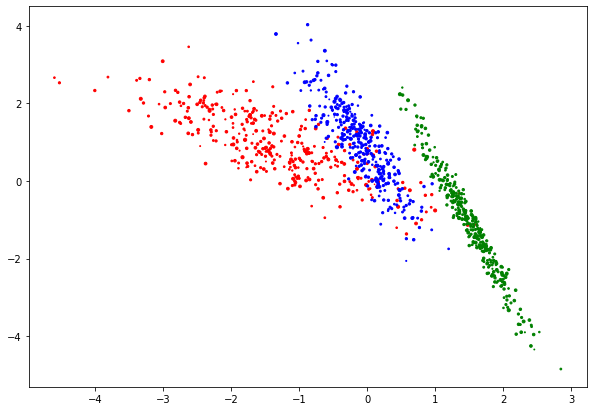

In [5]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y == 0, 1], X[y == 0, 2], s = X[y == 0, 3]*2+5, facecolor = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = X[y == 1, 3]*2+5, facecolor = 'green')
plt.scatter(X[y == 2, 1], X[y == 2, 2], s = X[y == 2, 3]*2+5, facecolor = 'blue')

In [6]:
clf1 = LogisticRegression()
clf1.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
svc = SVC(probability = True)
grid_model = GridSearchCV(svc,
                         param_grid = {
                             'C': [2, 3, 4, 5],
                         })
grid_model.fit(train_x, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
grid_model.best_params_

{'C': 5}

In [9]:
clf2 = SVC(**grid_model.best_params_, probability = True)
clf2.fit(train_x, train_y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
tree = DecisionTreeClassifier()
grid_model = GridSearchCV(tree,
                         param_grid = {
                             'max_depth': [5, 7, 9],
                             'max_leaf_nodes': [4, 5, 6],
                         })
grid_model.fit(train_x, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9], 'max_leaf_nodes': [4, 5, 6

In [11]:
grid_model.best_params_

{'max_depth': 5, 'max_leaf_nodes': 4}

In [12]:
clf3 = DecisionTreeClassifier(**grid_model.best_params_)
clf3.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
meta_train = []
for tst in vald_x:
    a = clf1.predict_proba([tst])[0]
    b = clf2.predict_proba([tst])[0]
    c = clf3.predict_proba([tst])[0]
    d = a+b+c
    meta_train.append(d/sum(d))

meta_train = np.array(meta_train)

In [55]:
meta_test = []
for tst in test_x:
    a = clf1.predict_proba([tst])[0]
    b = clf2.predict_proba([tst])[0]
    c = clf3.predict_proba([tst])[0]
    d = a+b+c
    meta_test.append(d/sum(d))

meta_test = np.array(meta_test)

In [56]:
meta_clf = RandomForestClassifier()
grid_model = GridSearchCV(meta_clf,
                         param_grid = {
                             'max_depth': [3, 4, 5],
                             'max_leaf_nodes': [2, 3, 4]
                         })
grid_model.fit(meta_train, vald_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [57]:
grid_model.best_params_

{'max_depth': 5, 'max_leaf_nodes': 3}

In [59]:
meta_clf = RandomForestClassifier(**grid_model.best_params_)
meta_clf.fit(meta_train, vald_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
meta_clf.score(meta_test, test_y)

0.935